In [4]:
## install and import dependencies 

!pip install prophet

In [5]:
import pandas as pd 
from prophet import Prophet

In [6]:
import warnings;
warnings.simplefilter('ignore')

# Read in Data and process dates

In [7]:
df = pd.read_csv('dataset.csv')

In [8]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [9]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [10]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [11]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [14]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month']+'-'+df['Day'])
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [15]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [16]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# Train Model

In [17]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

14:57:08 - cmdstanpy - INFO - Chain [1] start processing
14:57:09 - cmdstanpy - INFO - Chain [1] done processing


## Forecast Away

In [19]:
future = m.make_future_dataframe(periods = 100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.689704,786.342554,3859.014237,3041.689704,3041.689704,-642.043293,-642.043293,-642.043293,468.569986,...,16.627334,16.627334,16.627334,-1127.240613,-1127.240613,-1127.240613,0.0,0.0,0.0,2399.646411
1,2018-01-02,3042.449564,777.045223,3959.196019,3042.449564,3042.449564,-652.191387,-652.191387,-652.191387,468.569986,...,-11.269989,-11.269989,-11.269989,-1109.491384,-1109.491384,-1109.491384,0.0,0.0,0.0,2390.258177
2,2018-01-03,3043.209424,854.258590,4132.239922,3043.209424,3043.209424,-626.373366,-626.373366,-626.373366,468.569986,...,-4.392342,-4.392342,-4.392342,-1090.551010,-1090.551010,-1090.551010,0.0,0.0,0.0,2416.836058
3,2018-01-04,3043.969283,854.619518,4053.559863,3043.969283,3043.969283,-579.460690,-579.460690,-579.460690,468.569986,...,22.465599,22.465599,22.465599,-1070.496276,-1070.496276,-1070.496276,0.0,0.0,0.0,2464.508593
4,2018-01-05,3044.729143,835.076677,4192.537363,3044.729143,3044.729143,-615.474741,-615.474741,-615.474741,468.569986,...,-34.587957,-34.587957,-34.587957,-1049.456770,-1049.456770,-1049.456770,0.0,0.0,0.0,2429.254402


In [20]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4235.667647,2035.782317,5287.909377,4232.166256,4238.952369,-514.572606,-514.572606,-514.572606,468.569986,...,16.627334,16.627334,16.627334,-999.769926,-999.769926,-999.769926,0.0,0.0,0.0,3721.095041
1176,2021-03-23,4236.736783,2141.212292,5271.042768,4233.207283,4240.063752,-532.014616,-532.014616,-532.014616,468.569986,...,-11.269989,-11.269989,-11.269989,-989.314613,-989.314613,-989.314613,0.0,0.0,0.0,3704.722168
1177,2021-03-24,4237.805919,2177.114582,5374.633024,4234.290169,4241.159389,-517.459770,-517.459770,-517.459770,468.569986,...,-4.392342,-4.392342,-4.392342,-981.637414,-981.637414,-981.637414,0.0,0.0,0.0,3720.346149
1178,2021-03-25,4238.875055,2179.337084,5401.762855,4235.318516,4242.253818,-486.286042,-486.286042,-486.286042,468.569986,...,22.465599,22.465599,22.465599,-977.321628,-977.321628,-977.321628,0.0,0.0,0.0,3752.589013
1179,2021-03-26,4239.944191,2019.530390,5242.394032,4236.346083,4243.365972,-542.883552,-542.883552,-542.883552,468.569986,...,-34.587957,-34.587957,-34.587957,-976.865581,-976.865581,-976.865581,0.0,0.0,0.0,3697.060639


In [22]:
df.tail()

,y,ds
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15
1079,2585.035107,2020-12-16


In [23]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2399.646411
1,2018-01-02,2390.258177
2,2018-01-03,2416.836058
3,2018-01-04,2464.508593
4,2018-01-05,2429.254402
...,...,...
1175,2021-03-22,3721.095041
1176,2021-03-23,3704.722168
1177,2021-03-24,3720.346149
1178,2021-03-25,3752.589013


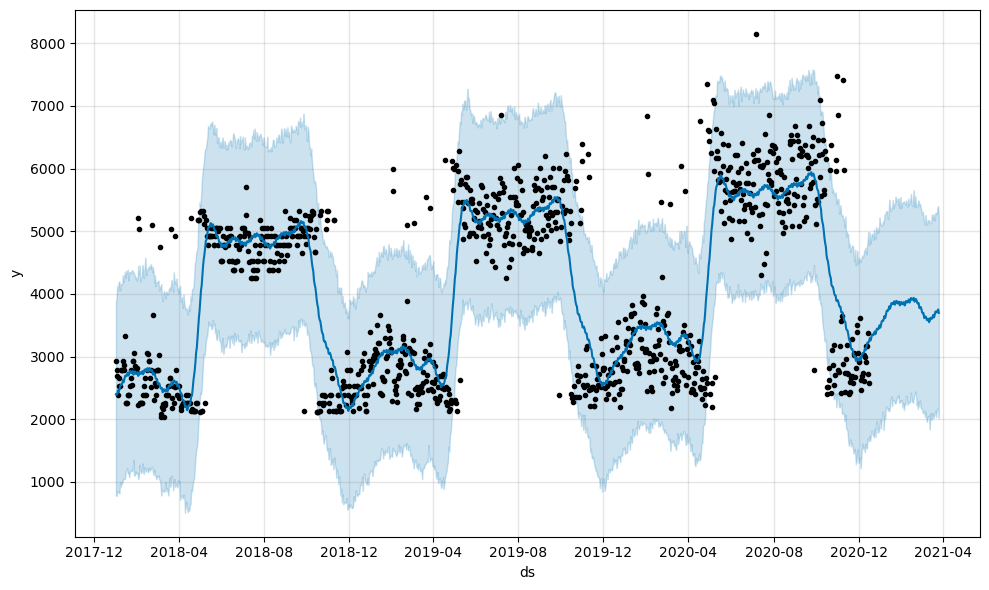

In [24]:
plot1 = m.plot(forecast)

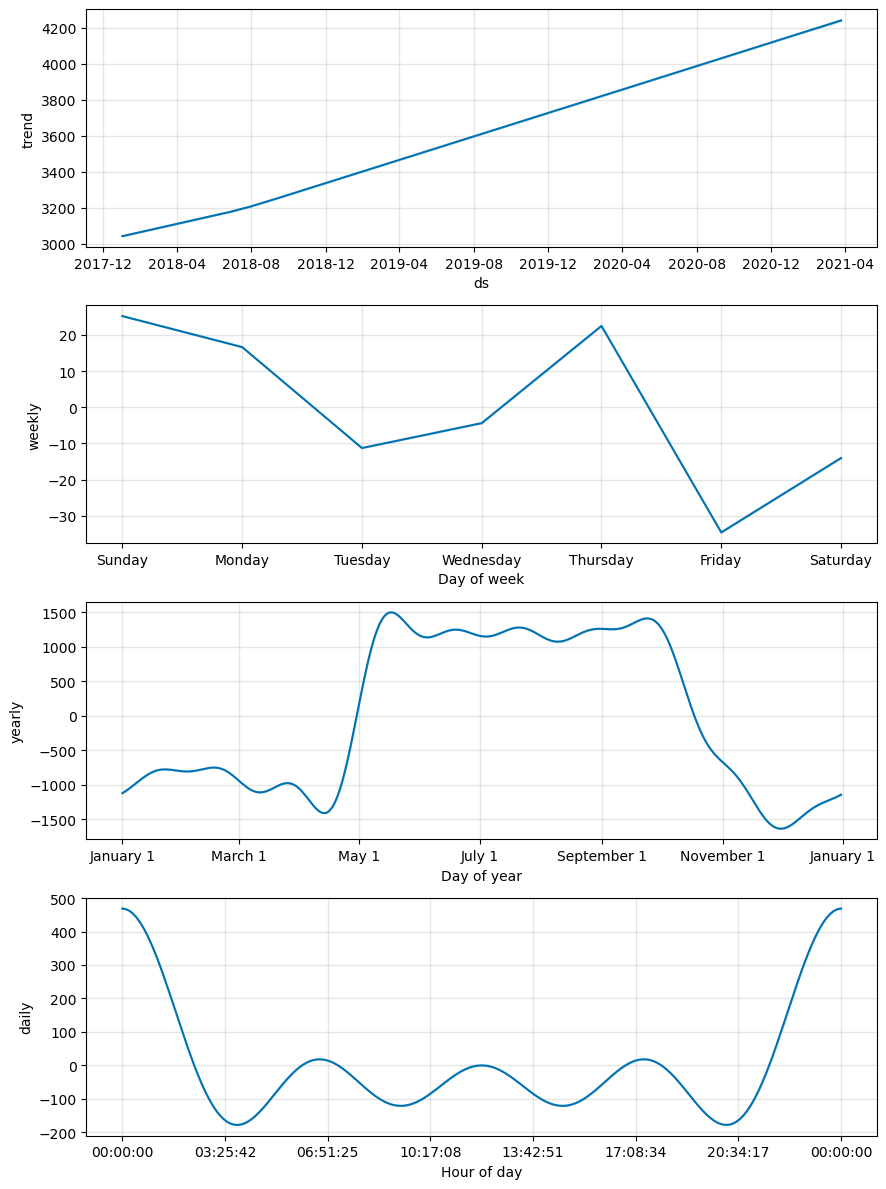

In [25]:
plot2 = m.plot_components(forecast)